In [1]:
# from joblib import Memory
# memory = Memory(location="./results_cache", verbose=1)

import shelve

cache = shelve.open("cache.pickle", writeback=True)
def memoize(func):
    global cache
    
    fname = func.__name__
    if fname not in cache:
        cache[fname] = dict()

    funccache = cache[fname]

    def callfunc(*args):
        global cache

        if args in funccache:
            return funccache[args]
        else:
            print(f"executing {fname}")
            val = func(*args)
            funccache[args] = val
            cache[fname] = funccache
            cache.sync()
            
            return val
        
    return callfunc

import os
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
from typing import Dict
from collections import defaultdict

import re

In [2]:
# ! pip install --upgrade transformers accelerate

In [3]:
pi = "3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201989380952572010654858632788659361533818279682303019520353018529689957736225994138912497217752834791315155748572424541506959508295331168617278558890750983817546374649393192550604009277016711390098488240128583616035637076601047101819429555961989467678374494482553797747268471040475346462080466842590694912933136770289891521047521620569660240580381501935112533824300355876402474964732639141992726042699227967823547816360093417216412199245863150302861829745557067498385054945885869269956909272107975093029553211653449872027559602364806654991198818347977535663698074265425278625518184175746728909777727938000816470600161452491921732172147723501414419735685481613611573525521334757418494684385233239073941433345477624168625189835694855620992192221842725502542568876717904946016534668049886272327917860857843838279679766814541009538837863609506800642251252051173929848960841284886269456042419652850222106611863067442786220391949450471237137869609563643719172874677646575739624138908658326459958133904780275900994657640789512694683983525957098258226205224894077267194782684826014769909026401363944374553050682034962524517493996514314298091906592509372216964615157098583874105978859597729754989301617539284681382686838689427741559918559252459539594310499725246808459872736446958486538367362226260991246080512438843904512441365497627807977156914359977001296160894416948685558484063534220722258284886481584560285060168427394522674676788952521385225499546667278239864565961163548862305774564980355936345681743241125150760694794510965960940252288797108931456691368672287489405601015033086179286809208747609178249385890097149096759852613655497818931297848216829989487226588048575640142704775551323796414515237462343645428584447952658678210511413547357395231134271661021359695362314429524849371871101457654035902799344037420073105785390621983874478084784896833214457138687519435064302184531910484810053706146806749192781911979399520614196634287544406437451237181921799983910159195618146751426912397489409071864942319615679452080951465502252316038819301420937621378559566389377870830390697920773467221825625996615014215030680384477345492026054146659252014974428507325186660021324340881907104863317346496514539057962685610055081066587969981635747363840525714591028970641401109712062804390397595156771577004203378699360072305587631763594218731251471205329281918261861258673215791984148488291644706095752706957220917567116722910981690915280173506712748583222871835209353965725121083579151369882091444210067510334671103141267111369908658516398315019701651511685171437657618351556508849099898599823873455283316355076479185358932261854896321329330898570642046752590709154814165498594616371802709819943099244889575712828905923233260972997120844335732654893823911932597463667305836041428138830320382490375898524374417029132765618093773444030707469211201913020330380197621101100449293215160842444859637669838952286847831235526582131449576857262433441893039686426243410773226978028073189154411010446823252716201052652272111660396665573092547110557853763466820653109896526918620564769312570586356620185581007293606598764861179104533488503461136576867532494416680396265797877185560845529654126654085306143444318586769751456614068007002378776591344017127494704205622305389945613140711270004078547332699390814546646458807972708266830634328587856983052358089330657574067954571637752542021149557615814002501262285941302164715509792592309907965473761255176567513575178296664547791745011299614890304639947132962107340437518957359614589019389713111790429782856475032031986915140287080859904801094121472213179476477726224142548545403321571853061422881375850430633217518297986622371721591607716692547487389866549494501146540628433663937900397692656721463853067360965712091807638327166416274888800786925602902284721040317211860820419000422966171196377921337575114959501566049631862947265473642523081770367515906735023507283540567040386743513622224771589150495309844489333096340878076932599397805419341447377441842631298608099888687413260472156951623965864573021631598193195167353812974167729478672422924654366800980676928238280689964004824354037014163149658979409243237896907069779422362508221688957383798623001593776471651228935786015881617557829735233446042815126272037343146531977774160319906655418763979293344195215413418994854447345673831624993419131814809277771038638773431772075456545322077709212019051660962804909263601975988281613323166636528619326686336062735676303544776280350450777235547105859548702790814356240145171806246436267945612753181340783303362542327839449753824372058353114771199260638133467768796959703098339130771098704085913374641442822772634659470474587847787201927715280731767907707157213444730605700733492436931138350493163128404251219256517980694113528013147013047816437885185290928545201165839341965621349143415956258658655705526904965209858033850722426482939728584783163057777560688876446248246857926039535277348030480290058760758251047470916439613626760449256274204208320856611906254543372131535958450687724602901618766795240616342522577195429162991930645537799140373404328752628889639958794757291746426357455254079091451357111369410911939325191076020825202618798531887705842972591677813149699009019211697173727847684726860849003377024242916513005005168323364350389517029893"
print(len(pi))

6267


In [4]:
import numpy as np
typs = [
    ("float16", np.float16), # np.half,
    ("float32", np.float32), # np.single,
    ("float64", np.float64), # np.double, # builtins.float
    ("float128", np.float128), # np.longdouble
]
#for typ in typs:
#    print(typ, np.finfo(typ[1]))

zeroish = np.finfo(np.float64).tiny
print(zeroish)

2.2250738585072014e-308


In [32]:
model_names = [
    "bigscience/bloom-560m", "bigscience/bloom-1b1", "bigscience/bloom-1b7", 
    "bigscience/bloom-3b", "bigscience/bloom-7b1", # "bigscience/bloom",
    "openai-gpt", # gpt 1
    "distilgpt2", "gpt2", "gpt2-medium", "gpt2-large", "gpt2-xl", # gpt 2
    "facebook/opt-125m", "facebook/opt-350m", "facebook/opt-1.3b", "facebook/opt-2.7b", 
    "facebook/opt-6.7b", # "facebook/opt-13b", # "facebook/opt-30b", # 'facebook/opt-66b'
]
# bigscience/bloom (176B) is too big

In [8]:
# from accelerate import init_empty_weights, load_checkpoint_and_dispatch, infer_auto_device_map
# from transformers import AutoConfig, AutoModel

pat = re.compile(r'[0-9]+')

# device = "cuda:0"
# device = "cpu"

floaty = np.float128

def load_model(model_name):
    torch.cuda.empty_cache()

    # checkpoint = "/home/piotrm/.cache/huggingface/hub/models--bigscience--bloom-7b1/snapshots/e83e90ba86f87f74aa2731cdab25ccf33976bd66"
    # checkpoint = "/home/piotrm/.cache/huggingface/hub/models--bigscience--bloom-560m/snapshots/e985a63cdc139290c5f700ff1929f0b5942cced2"
    # checkpoint = "/home/piotrm/.cache/huggingface/hub/models--facebook--opt-6.7b/snapshots/a45aa65bbeb77c1558bc99bedc6779195462dab0"

    # config = AutoConfig.from_pretrained(model_name)
    #with init_empty_weights():
    model = AutoModelForCausalLM.from_pretrained(model_name, device_map='auto')
        # model = AutoModel.from_pretrained(model_name)
        # config = model.config

    #device_map = infer_auto_device_map(model, max_memory={0: '18GIB', 1: '18GIB'})
    #for k, v in list(device_map.items()):
    #    print(k, v)

    #first_device = next(iter(device_map.values()))
    first_device = 'cuda:0'

    #with init_empty_weights():
    #    model = AutoModelForCausalLM.from_config(config)
    # return model

    #model = load_checkpoint_and_dispatch(
    #   model, checkpoint, device_map=device_map
    #)
    
    # model.base_model = base_model
    #, no_split_module_classes=["GPTJBlock"]
    #)

    #print(f"loading model {model_name}")
    #model = AutoModelForCausalLM.from_pretrained(model_name)
    #model = model.to(device)

    print("loading tokenizer")
    tok = AutoTokenizer.from_pretrained(model_name)

    def tokenize(text):
        return tok.batch_encode_plus(
            [text],
            return_tensors='pt',
            max_length=4096,
            # padding=False,
            truncation=True,
            # return_token_type_ids=True,
            return_attention_mask=True
        ).to(first_device)

    def prob_next(text, tok_id, conditions=None):
        temp = model.forward(**tokenize(text))
        logits = temp['logits'][0,-1].detach().cpu()
        probits = torch.nn.functional.softmax(logits, dim=0)

        tok_prob = floaty(probits[tok_id].detach().cpu().numpy().item())

        if conditions != None:
            cond_prob = floaty(probits[conditions].detach().cpu().numpy().sum())
        else:
            cond_prob = floaty(1.0)

        return tok_prob / cond_prob
    
    return model, tok, tokenize, prob_next

In [ ]:
for k,v in cache.items():
    print(k)
    for k2,v2 in v.items():
        print("  ", k2)

In [9]:
@memoize
def get_stats_for_model(model_name):
    model, tok, tokenize, prob_next = load_model(model_name)

    vocab = {tok.decode(i): i for i in range(len(tok.vocab))}

    num_toks = []

    for k, i in vocab.items():
        if pat.fullmatch(k):
            num_toks.append((k, i))

    print(f"tokenizer has {len(num_toks)} digit(s) tokens")

    num_tok_ids = [nt[1] for nt in num_toks]

    def next_toks(pos):
        ret = []
        for tok in num_toks:
            if pi[pos:].startswith(tok[0]):
                ret.append(tok)
        return ret
    
    def runsteps(i):
        state = defaultdict(floaty)
        state[i] = floaty(1.0)
        finals = defaultdict(floaty)

        print("starting ", pi[0:i+1])

        while len(state) > 0:
            print("\r", state, end="")
            step(state, finals)

        print()
        
        return finals

    def step(state: Dict, finals: Dict):
        pos, prob = next(iter(state.items()))

        del state[pos]

        finals[pos] += prob            
        if prob <= zeroish:
            return

        for step in next_toks(pos):
            state[pos + len(step[0])] += prob * prob_next(pi[0:pos], step[1], num_tok_ids)

    def n_or_more(probs, n):
        if n >= len(probs):
            return 0.0
        
        p = probs[n]

        return p + (1.0 - p) * n_or_more(probs, n+1)
    
    q = runsteps(3)

    texts = [pi[i] for i in q.keys()]
    probs = list(q.values())
    cumul = [n_or_more(probs, i) for i in range(len(probs))]

    texts = ["3.1"] + texts
    probs = [1.0] + probs
    cumul = [1.0] + cumul

    return q, texts, probs, cumul

In [10]:
ress_probs = {model_name: get_stats_for_model(model_name) for model_name in model_names}

executing get_stats_for_model


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

loading tokenizer
tokenizer has 1365 digit(s) tokens
starting  3.14
 defaultdict(<class 'numpy.float128'>, {458: 6.5039291638504365764e-314})58: 6.5039291638504365764e-314})458: 6.5039291638504365764e-314})))52: 3.1904389664155268694e-308})52: 3.1904389664155268694e-308})445: 6.101421882354227698e-310})})37: 2.8331445939760531456e-302}))


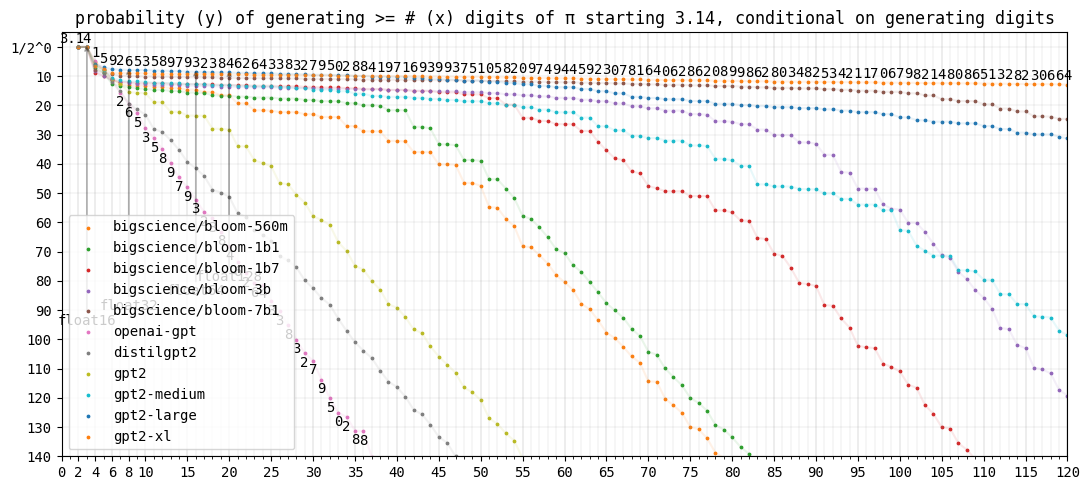

In [22]:
ress = {k: v for k, v in ress_probs.items() if "bloom" in k}
ress = ress_probs

import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.antialiased'] = True
matplotlib.rcParams['text.usetex'] = False

import numpy as np

fig, ax = plt.subplots(figsize=(11,5))

mini = 0
maxi = 120

ax.set_yscale("log", base=2)

ax.set_xticks(list(range(0,10,2)) + list(range(10,200,5)), which="major")

ax.set_xticks(list(range(0,200,1)), minor=True)

ax.yaxis.set_major_formatter(lambda a,b: f"1/2^{b}" if b == 0 else str(b*10))
ax.set_yticks([0.5 ** i for i in range(0, 260, 10)])

ax.grid(which='both', axis='y', visible=True, lw=0.1, c='gray')

ax.grid(which='major', axis='x', visible=True, lw=0.2, c='gray')
ax.grid(which='minor', axis='x', visible=True, lw=0.1, c='gray')

colors = [f'C{i}' for i in range(1, 20)]

ymin = 0.5**140

xoff = 0.0 # -0.2

ys = []

for model_name, (q, texts, probs, cumul) in ress.items():
    color = colors[0]
    colors = colors[1:]

    xs = np.array(list(q.keys())).astype(float) - 1

    xts = xs.copy()

    xts[0] = xs[0] - 0.75
    xts[1:] = xs[1:] + xoff

    ax.plot(xs[mini:maxi], cumul[mini:maxi], color=color, alpha=0.1)
    ax.scatter(xs[mini:maxi], cumul[mini:maxi], label=model_name, color=color, s=3, alpha=1.0)

    ys.append(np.array(cumul[mini:maxi]))

    if model_name in model_names[-1:]:
        for x, xt, y, t in list(zip(xs, xts, cumul, texts))[mini:maxi]:
            
            if y < ymin:
                continue

ys = np.vstack(ys)


from math import log

for x, y1, y2, t in list(zip(xts, ys.min(axis=0), ys.max(axis=0), texts))[mini:maxi]:
    if y2 > ymin:
        ax.annotate(t, (x, y2), xytext=(0.0, 1.0), textcoords="offset points", horizontalalignment="center", verticalalignment="bottom", color="black")#, family='monospace')
    if y1 > ymin and abs(log(y1)/log(0.5) - log(y2)/log(0.5)) > 5:
        ax.annotate(t, (x, y1), xytext=(0.0, -2.0), textcoords="offset points", horizontalalignment="center", verticalalignment="top", color="black")#, family='monospace')

ax.set_ylim(ymin, 2**5)

ax.set_xlim(mini, maxi)

ax.set_title("""probability (y) of generating >= # (x) digits of π starting 3.14, conditional on generating digits""")
ax.legend(loc='lower left')

fig.tight_layout()

yannot = ys.max(axis=0)

for yoff, typ in enumerate(typs):
    pin = str(typ[1](pi))
    n = len(pin)-1
    tipy = yannot[n-2]
    ax.annotate(
        typ[0],# + " / " + pin,
        xy=(n, tipy), xytext=(n, 0.5 ** (95-5*yoff)), xycoords='data', horizontalalignment="center",
        arrowprops=dict(width=0.1, facecolor='black', shrink=0.00, headwidth=3.0, headlength=3.0, alpha=0.25)
    )

# fig

fig.savefig("pigen-bloom.png")

In [37]:
# greedy pi generation: starting 3.14, generate the most likely digit(s) until no longer pi

@memoize
def greedy_pi(model_name, start="3.14"):
    print(model_name)
    
    # model_name = model_names[0]
    model, tok, tokenize, prob_next = load_model(model_name)

    num_toks = []
    vocab = {tok.decode(i): i for i in range(len(tok.vocab))}
    for k, i in vocab.items():
        if pat.fullmatch(k):
            num_toks.append((k, i))
    num_tok_ids = [nt[1] for nt in num_toks]

    def greedy_next(text, conditions=None):
        temp = model.forward(**tokenize(text))
        logits = temp['logits'][0,-1].detach().cpu()
        probits = torch.nn.functional.softmax(logits, dim=0)

        if conditions is None:
            mask = 1.0
        else:
            mask = np.zeros_like(probits)
            np.put(mask, conditions, 1.0)

        return np.argmax(probits*mask)

    current = start

    print("starting", current)

    while pi.startswith(current):
        next_part = tok.decode(greedy_next(current,  num_tok_ids))
        current += next_part

    while not pi.startswith(current):
        current = current[0:len(current)-1]

    print(current, len(current))

    return current, len(current)

# greedy_pi("", "3.14159")

In [38]:
start = "3.14159"

ress_greedy_314159 = {model_name: greedy_pi(model_name, start) for model_name in model_names}

executing greedy_pi
facebook/opt-125m
loading tokenizer


AttributeError: 'GPT2Tokenizer' object has no attribute 'vocab'

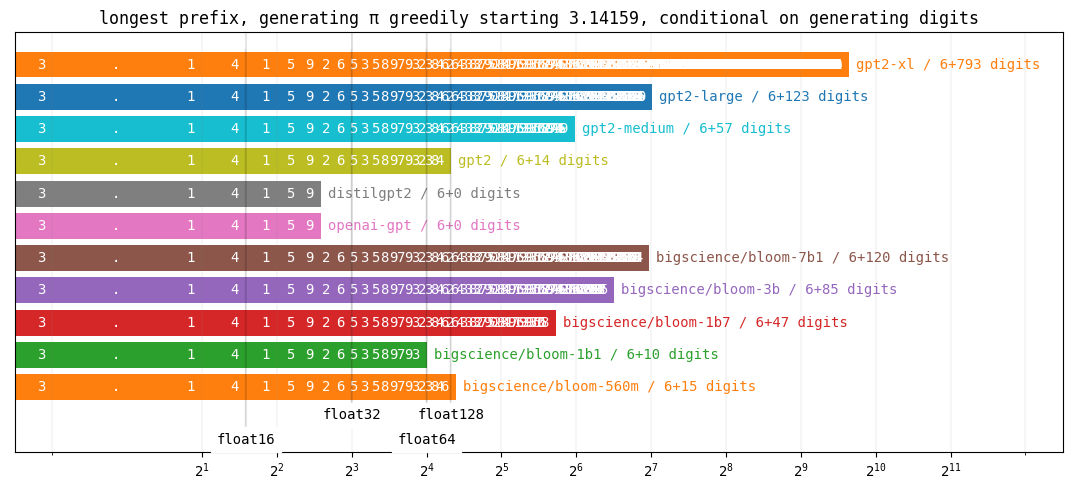

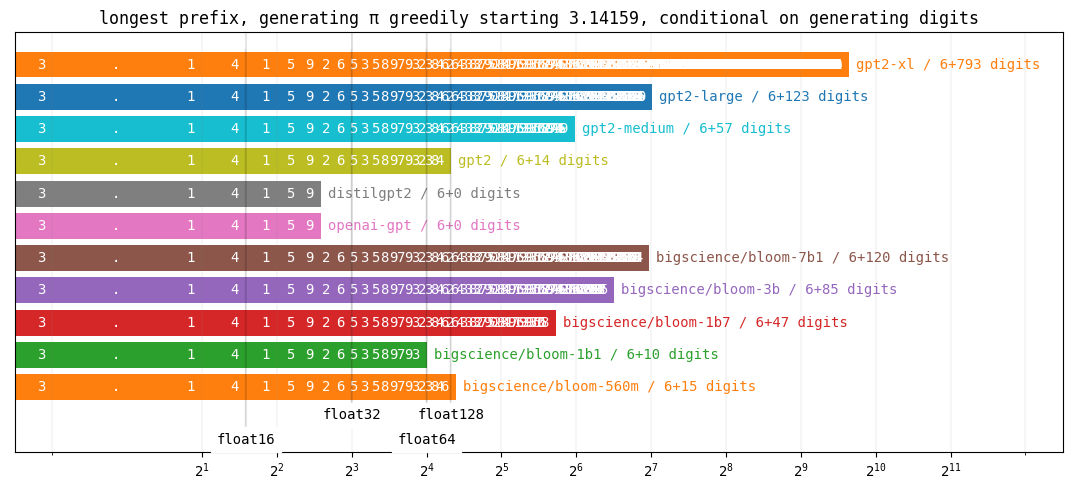

In [26]:
ress = dict()
ress.update(ress_greedy_314159)
# ress.update(ress_greedy2)

import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.antialiased'] = True
matplotlib.rcParams['text.usetex'] = False

import numpy as np

fig, ax = plt.subplots(figsize=(11,5))

# cumul = [sum(probs[i:]) for i in range(len(probs))]

mini = -0.5
maxi = 100 #len(cumul)-1
maxi = 2 ** 12.5

# ax.set_yscale("log", base=2)

ax.set_xscale("symlog", base=2)
# ax.set_xticks(list(q.keys())[mini:maxi])
# ax.set_xticklabels(texts[mini:maxi])#, rotation=90)

#ax.set_xticks(list(range(0,10,2)) + list(range(10,200,5)), which="major")
#ax.set_xticks(list(range(0,200,1)), minor=True)
# ax.set_xticklabels([], which="minor")

# ax.yaxis.set_major_formatter(lambda a,b: f"1/2^{b}" if b == 0 else str(b*10))
# ax.set_yticks([0.5 ** i for i in range(0, 260, 10)])

ax.grid(which='both', axis='x', visible=True, lw=0.1, c='gray')
ax.set_xticks([2**i for i in range(1,12)])
ax.set_yticks([], left=False)

# ax.grid(which='major', axis='x', visible=True, lw=0.2, c='gray')
# ax.grid(which='minor', axis='x', visible=True, lw=0.1, c='gray')

# fig.tight_layout()

colors = [f'C{i}' for i in range(1, 20)]

ymin = 0.5**140

xoff = 0.0 # -0.2

ys = []

bar_y = []
bar_width = []
bar_color = []

for y, (model_name, (maxpi, maxn)) in enumerate(ress.items()):
    color = colors[0]
    colors = colors[1:]

    xs = np.array(list(range(maxn)))
    # ys = np.array([y] * len(xs))
    texts = np.array([pi[i] for i in xs])

    # print(xs.shape, ys.shape, texts.shape)

    ax.annotate(
        xy=(xs[-1], y), xytext=(5.0, 0), 
        textcoords="offset points", 
        text=f"{model_name} / {len(start)-1}+{maxn-len(start)} digits", color=color,
        verticalalignment="center",
        )

    for x, t in zip(xs, texts):
        # print(x, y, t)
        alpha = 1.0
        # if x < len(start):
            # alpha = 0.5
        ax.annotate(xy=(x, y) , text=t, xytext=(-5,0), textcoords="offset points", color="white", alpha=alpha, horizontalalignment="right", verticalalignment="center")

    bar_y.append(y)
    bar_width.append(xs[-1]+1)
    bar_color.append(color)

ax.barh(y=bar_y, width=bar_width, color=bar_color, left=-1)

for yoff, typ in enumerate(typs):
    pin = str(typ[1](pi))
    n = len(pin)-1
    tipy = len(ress)
    ax.annotate(
        typ[0],
        xy=(n, tipy), xytext=(n, -1.75 + 0.75*(yoff % 2)), xycoords='data', horizontalalignment="center", backgroundcolor="white",
        arrowprops=dict(width=0.5, facecolor='black', shrink=0.00, headwidth=0.0, alpha=0.1)
    )

ax.set_title(f"longest prefix, generating π greedily starting {start}, conditional on generating digits")

ax.set_xlim(mini, maxi)
ax.set_ylim(-2.0, len(ress))
fig.tight_layout()

fig.savefig("pigen-greedy.png")

fig

In [ ]:
# out = model(**tokenize("hello"))
from ipywidgets import widgets, interact
import matplotlib.pyplot as plt

ress = []

@interact(input_text=widgets.Text("Fill in the name of these NBA players: Michael", continuous_update=True))
def generate(input_text):
    global ress

    if len(input_text) == 0: return

    temp = model.forward(**tokenize(input_text))

    logits = temp['logits'][0,-1].detach().cpu()
    probits = torch.nn.functional.softmax(logits, dim=0)

    tops = torch.topk(probits, 10)

    toks = tok.batch_decode(tops.indices)

    ress = [str(toks)] + ress
    ress = ress[0:10]

    fig, ax = plt.subplots()

    ax.bar(x=range(10), height=tops.values)
    ax.set_xticks(range(len(toks)))
    ax.set_xticklabels(toks)

    for res in ress:
        print(res)

In [ ]:
model, tok, tokenize, prob_next = load_model(model_names[0])

In [30]:
@memoize
def model_size(model_name):
    torch.cuda.empty_cache()
    print(f"loading model {model_name}")
    model = AutoModelForCausalLM.from_pretrained(model_name)
    
    def product(its):
        temp = 1
        for it in its:
            temp *= it
        return temp

    total = 0
    for p in model.parameters():
        #print(p.dtype, product(p.shape))
        total += product(p.shape)

    return total

In [33]:
sizes = {m: model_size(m) for m in model_names}

executing model_size
loading model facebook/opt-125m


executing model_size
loading model facebook/opt-350m


executing model_size
loading model facebook/opt-1.3b


executing model_size
loading model facebook/opt-2.7b


executing model_size
loading model facebook/opt-6.7b


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [34]:
sizes

{'bigscience/bloom-560m': 559214592,
 'bigscience/bloom-1b1': 1065314304,
 'bigscience/bloom-1b7': 1722408960,
 'bigscience/bloom-3b': 3002557440,
 'bigscience/bloom-7b1': 7069016064,
 'openai-gpt': 116534784,
 'distilgpt2': 81912576,
 'gpt2': 124439808,
 'gpt2-medium': 354823168,
 'gpt2-large': 774030080,
 'gpt2-xl': 1557611200,
 'facebook/opt-125m': 125239296,
 'facebook/opt-350m': 331196416,
 'facebook/opt-1.3b': 1315758080,
 'facebook/opt-2.7b': 2651596800,
 'facebook/opt-6.7b': 6658473984}

In [35]:
xs = []
ys = []

for m in model_names:
    size = sizes[m]
    digits = ress_greedy_314159[m][1]

    xs.append(size)
    ys.append(digits-len(start))

    dpp = 1024 * 1024 * 1024 * float(digits) / float(size)
    print(m, dpp)

bigscience/bloom-560m 42.241959465893196
bigscience/bloom-1b1 17.13448410432683
bigscience/bloom-1b7 33.66335164443176
bigscience/bloom-3b 32.90003597999444
bigscience/bloom-7b1 19.290550539623162
openai-gpt 64.4974187964342
distilgpt2 91.7587156336043
gpt2 181.20068381976287
gpt2-medium 193.67246260537306
gpt2-large 180.33722555071762
gpt2-xl 551.4813062463855


KeyError: 'facebook/opt-125m'

In [ ]:
ys

In [ ]:
fig, ax = plt.subplots()
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ax.set_ylabel("[#] greedy pi digits")
ax.set_xlabel("[#] model parameters")
ax.scatter(xs, ys, color="black", s=10)
ax.grid(visible=True, which='both')

colors = [f'C{i}' for i in range(1, 20)]

for i, (m, x, y) in enumerate(zip(model_names, xs, ys)):
    ax.annotate(m, xy=(x,y), xytext=(3,3), textcoords="offset points", color=colors[i])

ax.set_title(f"# of greedy π digits starting {start} vs. # of parameters")
fig.savefig("pigen-stats.png")

In [ ]:
h = f"""<table border='1'>
<tr>
<th>model</th>
<th># parameters (G=2^30)</th>
<th># of greedy pi digits beyond the starting {start}</th>
<th>digits per G params</th>
</tr>
"""
for m, x, y in zip(model_names, xs, ys):
    h += f"""
    <tr>
      <td>{m}</td>
      <td>{x/(2**30):0.2f} G</td>
      <td>{y}</td>
      <td>{(2**30)*y/x:0.1f}</td>
    </tr>
    """
    
h += """
</table>
"""
widgets.HTML(h)

In [ ]:
print(h)